In [29]:
from surprise import Dataset, Reader
import pandas as pd

data = pd.read_csv("ratings.csv", header=0)
print(data)
reader = Reader(rating_scale=(1, 5))

# Используем метод load_from_df для создания объекта Dataset
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)


        userId  movieId  rating   timestamp
0            1       31     2.5  1260759144
1            1     1029     3.0  1260759179
2            1     1061     3.0  1260759182
3            1     1129     2.0  1260759185
4            1     1172     4.0  1260759205
...        ...      ...     ...         ...
99999      671     6268     2.5  1065579370
100000     671     6269     4.0  1065149201
100001     671     6365     4.0  1070940363
100002     671     6385     2.5  1070979663
100003     671     6565     3.5  1074784724

[100004 rows x 4 columns]


FunkSVD

In [17]:
# Использование градиентного спуска (FunkSVD)
model = SVD(biased=True)

cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
trainset = data.build_full_trainset()
k=model.fit(trainset)
# Пример предсказания для конкретного пользователя и товара (предварительно определите uid и iid)
uid = str(196)  # Пример id пользователя
iid = str(302)  # Пример id товара
pred = model.predict(uid, iid, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8959  0.8977  0.8953  0.8973  0.8975  0.8967  0.0010  
MAE (testset)     0.6911  0.6934  0.6875  0.6900  0.6912  0.6907  0.0019  
Fit time          1.11    0.86    0.77    0.79    0.78    0.86    0.13    
Test time         0.31    0.07    0.07    0.07    0.07    0.11    0.10    
user: 196        item: 302        r_ui = None   est = 3.54   {'was_impossible': False}


SVD

In [18]:
model = SVD()
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
trainset = data.build_full_trainset()
model.fit(trainset)
# Пример предсказания для конкретного пользователя и товара (предварительно определите uid и iid)

pred = model.predict(uid, iid, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8905  0.8944  0.9020  0.9005  0.9005  0.8976  0.0044  
MAE (testset)     0.6842  0.6885  0.6983  0.6921  0.6943  0.6915  0.0048  
Fit time          1.13    0.89    0.80    0.80    0.80    0.88    0.13    
Test time         0.31    0.07    0.07    0.07    0.07    0.12    0.10    
user: 196        item: 302        r_ui = None   est = 3.54   {'was_impossible': False}


SVD++

In [19]:
# SVD++ (Surprise)
from surprise import SVD, SVDpp

svdpp_model = SVDpp()
svdpp_results = cross_validate(svdpp_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("\nРезультаты для SVD++:")
print("Средний RMSE:", svdpp_results['test_rmse'].mean())
print("Средний MAE:", svdpp_results['test_mae'].mean())


Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8870  0.8873  0.8870  0.8850  0.8903  0.8873  0.0017  
MAE (testset)     0.6782  0.6830  0.6796  0.6808  0.6811  0.6806  0.0016  
Fit time          71.35   86.57   67.73   79.62   78.45   76.74   6.61    
Test time         8.64    6.37    13.16   6.43    13.10   9.54    3.04    

Результаты для SVD++:
Средний RMSE: 0.8873211940956421
Средний MAE: 0.6805554592510589


In [20]:
pred = svdpp_model.predict(uid, iid, verbose=True)


user: 196        item: 302        r_ui = None   est = 3.54   {'was_impossible': False}


In [22]:
import time

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from surprise.model_selection import cross_validate
from surprise import SVD, SVDpp

def measure_time(model, data):
    start_time = time.time()
    cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    return time.time() - start_time

# Загрузка данных

# Создание моделей
svd_model = SVD()
funk_model = SVD(biased=True)
svdpp_model = SVDpp()

# Измерение времени работы для каждой модели
svd_time = measure_time(svd_model, data)
funk_time = measure_time(funk_model, data)
svdpp_time = measure_time(svdpp_model, data)

# Измерение метрик для каждой модели
svd_results = cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
funk_results = cross_validate(funk_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
svdpp_results = cross_validate(svdpp_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

# Создание DataFrame для удобства визуализации
results_df = pd.DataFrame({
    'Model': ['SVD', 'FunkSVD', 'SVD++'],
    'RMSE': [svd_results['test_rmse'].mean(), funk_results['test_rmse'].mean(), svdpp_results['test_rmse'].mean()],
    'MAE': [svd_results['test_mae'].mean(), funk_results['test_mae'].mean(), svdpp_results['test_mae'].mean()],
    'Time': [svd_time, funk_time, svdpp_time]
})


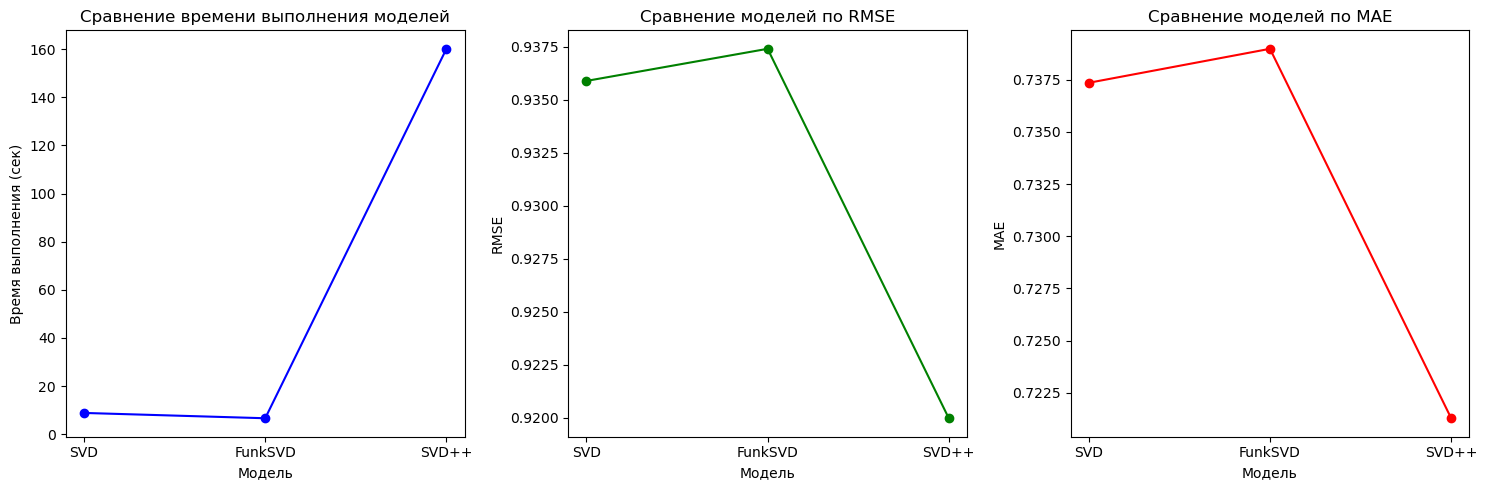

In [23]:

# Визуализация в виде трех отдельных графиков
plt.figure(figsize=(15, 5))

# График времени работы
plt.subplot(1, 3, 1)
plt.plot(results_df['Model'], results_df['Time'], marker='o', color='blue')
plt.xlabel('Модель')
plt.ylabel('Время выполнения (сек)')
plt.title('Сравнение времени выполнения моделей')

# График RMSE
plt.subplot(1, 3, 2)
plt.plot(results_df['Model'], results_df['RMSE'], marker='o', color='green')
plt.xlabel('Модель')
plt.ylabel('RMSE')
plt.title('Сравнение моделей по RMSE')

# График MAE
plt.subplot(1, 3, 3)
plt.plot(results_df['Model'], results_df['MAE'], marker='o', color='red')
plt.xlabel('Модель')
plt.ylabel('MAE')
plt.title('Сравнение моделей по MAE')

plt.tight_layout()
plt.show()

In [24]:
results_df = pd.DataFrame({
    'Model': ['SVD', 'FunkSVD', 'SVD++'],
    'RMSE': [svd_results['test_rmse'].mean(), funk_results['test_rmse'].mean(), svdpp_results['test_rmse'].mean()],
    'MAE': [svd_results['test_mae'].mean(), funk_results['test_mae'].mean(), svdpp_results['test_mae'].mean()],
    'Time': [svd_time, funk_time, svdpp_time]
})

In [26]:
print(svd_results)

{'test_rmse': array([0.94151097, 0.9370718 , 0.93272862, 0.93450704, 0.93364186]), 'test_mae': array([0.74225369, 0.74130543, 0.7336652 , 0.73575706, 0.73376321]), 'fit_time': (0.7320981025695801, 0.7638566493988037, 0.743319034576416, 0.7371475696563721, 0.734175443649292), 'test_time': (0.06784725189208984, 0.06594157218933105, 0.06715178489685059, 0.2124471664428711, 0.0673832893371582)}


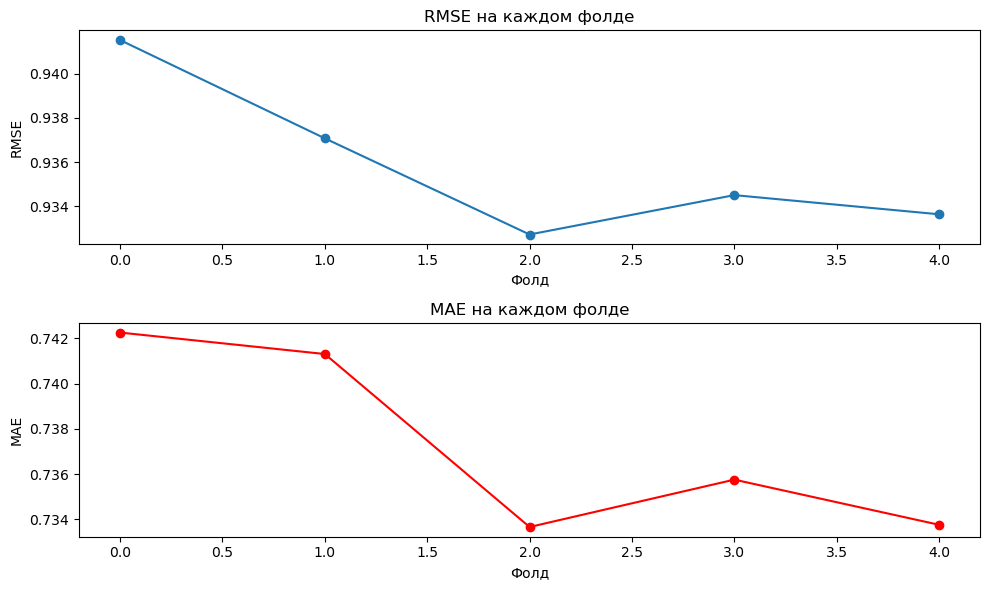

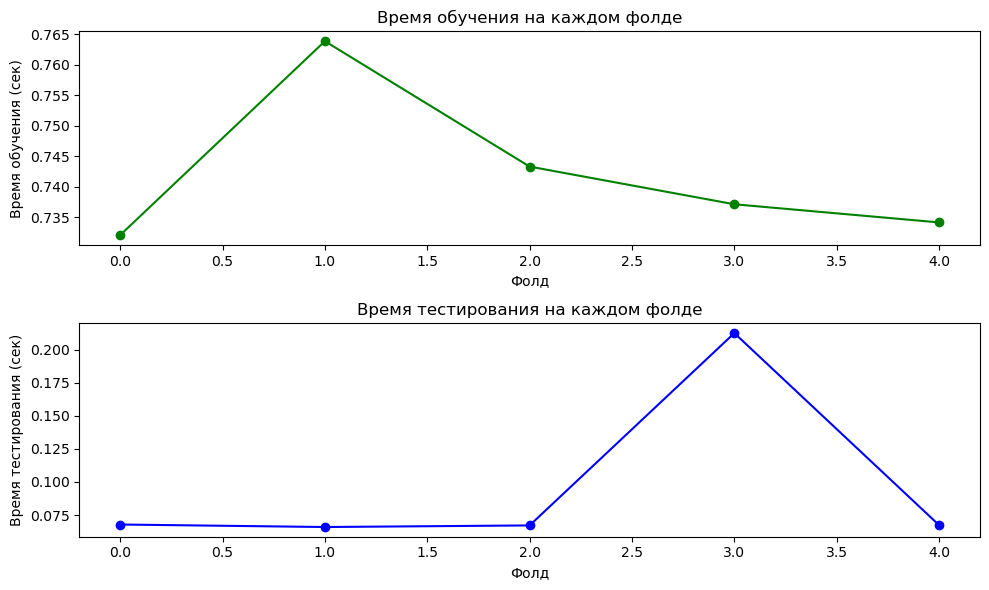

In [28]:
# График RMSE
test_rmse = svd_results['test_rmse']
test_mae = svd_results['test_mae']
fit_time = svd_results['fit_time']
test_time = svd_results['test_time']

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(test_rmse, marker='o')
plt.title('RMSE на каждом фолде')
plt.xlabel('Фолд')
plt.ylabel('RMSE')

# График MAE
plt.subplot(2, 1, 2)
plt.plot(test_mae, marker='o', color='r')
plt.title('MAE на каждом фолде')
plt.xlabel('Фолд')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

# Графики времени обучения и тестирования
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(fit_time, marker='o', color='g')
plt.title('Время обучения на каждом фолде')
plt.xlabel('Фолд')
plt.ylabel('Время обучения (сек)')

plt.subplot(2, 1, 2)
plt.plot(test_time, marker='o', color='b')
plt.title('Время тестирования на каждом фолде')
plt.xlabel('Фолд')
plt.ylabel('Время тестирования (сек)')

plt.tight_layout()
plt.show()